<a href="https://cognitiveclass.ai"><img src = "https://ibm.box.com/shared/static/9gegpsmnsoo25ikkbl4qzlvlyjbgxs5x.png" width = 400> </a>

<h1 align=center><font size = 5>Battle of the Cities: Small Town USA - Lamar, CO</font></h1>

## Introduction

All across America’s Midwest there are hundreds of small and medium sized communities that are struggling to remain alive, vibrant, and relevant to the families who live there. Many of these cities were established during the frontier expansion of the United States during the 19th century. They served as the highways and supply lines carrying eastern goods across the country and for delivering farm produce to both coasts. They are the typification of the term “Small Town America”. However, as the wealth, resources, and opportunities of the mid-twentieth and early twenty-first century have greatly expanded in metropolitan areas, these small towns have remained stuck with low incomes and few opportunities for the next generation that is raised there. 
This report uses Four Square location data and machine learning techniques to explore and compare two of these towns in Southeastern Colorado. The objective is to identify the advantages and quality of living in both towns. The data and report will be useful to the cities’ leaders as they seek to develop a more robust economy for their community. 
This report is structured as a consulting product commissioned by the city leaders of Lamar, CO to assist them in competing for economic opportunities with their historical rival, La Junta, CO. 

## 1. Setup Panda Environment and Pull Data

### A. Import Necessary Libraries

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


### B. Define Foursquare Credentials and Version

In [2]:
CLIENT_ID = 'QPRY52CVA3Z0XPZDEUKMDNXSA0DA5EXWRE23L1ENSG5ZGBLQ' # your Foursquare ID
CLIENT_SECRET = '1WGT1QSFXD4QYYFFG0ZIB2VB1TG5UCPWCHRQME2UQLSPLG5V' # your Foursquare Secret
VERSION = '20180604'
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: QPRY52CVA3Z0XPZDEUKMDNXSA0DA5EXWRE23L1ENSG5ZGBLQ
CLIENT_SECRET:1WGT1QSFXD4QYYFFG0ZIB2VB1TG5UCPWCHRQME2UQLSPLG5V


#### So let's start by converting the city search center address to its latitude and longitude coordinates.

In [3]:
# Search Location
city = 'Lamar, CO'
SearchCenter = 'City Hall'
address = '102 E Parmenter St, Lamar, CO 81052'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  


38.0849865050505 -102.618719323232


<a id="item1"></a>

## 2. Search for the venues of interest
> `https://api.foursquare.com/v2/venues/`**search**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&ll=`**LATITUDE**`,`**LONGITUDE**`&v=`**VERSION**`&query=`**QUERY**`&radius=`**RADIUS**`&limit=`**LIMIT**

### A. Search for all venues within 1600 meters (approx 1 mile) of the main intersection. 

In [4]:
search_query = '' #Use this too pull every venue entry
radius = 1600 #1600 meters is approx 1 mile
LIMIT = 103 # Total for '' is 103
print(search_query + ' .... OK!')

 .... OK!


#### Define the corresponding URL

In [5]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=QPRY52CVA3Z0XPZDEUKMDNXSA0DA5EXWRE23L1ENSG5ZGBLQ&client_secret=1WGT1QSFXD4QYYFFG0ZIB2VB1TG5UCPWCHRQME2UQLSPLG5V&ll=38.0849865050505,-102.618719323232&v=20180604&query=&radius=1600&limit=103'

#### Send the GET Request and examine the results

In [6]:
results = requests.get(url).json()
#results

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [7]:
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
print(dataframe.shape)
dataframe.head()

(103, 17)


,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d12e941735', 'name': 'P...",False,4e541a7245ddffa8d196546a,103 E Oak St,US,Lamar,United States,NaN,158,"[103 E Oak St, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08632659912109...",38.086327,-102.618111,81052,CO,Prowers County Sheriffs Office,v-1547689530
1,"[{'id': '4f4533814b9074f6e4fb0106', 'name': 'M...",False,4dc1d7f57d8b686fa4700cfe,104 Park,US,Lamar,United States,NaN,204,"[104 Park, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08327830407507...",38.083278,-102.619578,81052,CO,Lamar Middle School,v-1547689530
2,"[{'id': '4bf58dd8d48988d12f941735', 'name': 'L...",False,4dac75f24df01c19b1b4ddba,102 E Parmenter St,US,Lamar,United States,NaN,43,"[102 E Parmenter St, Lamar, CO 81052, United S...","[{'label': 'display', 'lat': 38.08490368653267...",38.084904,-102.618238,81052,CO,Lamar Public Library,v-1547689530
3,"[{'id': '4bf58dd8d48988d1c1941735', 'name': 'M...",False,4db1c3fb0cb6442b2ed0c4d6,301-399 S Main St,US,Lamar,United States,NaN,236,"[301-399 S Main St, Lamar, CO 81052, United St...","[{'label': 'display', 'lat': 38.08705687398643...",38.087057,-102.619348,81052,CO,Las Brisas Mexican Restaurant,v-1547689530
4,"[{'id': '4d4b7105d754a06375d81259', 'name': 'P...",False,4e243ccbfa761d6710979c5c,NaN,US,Lamar,United States,NaN,74,"[Lamar, CO, United States]","[{'label': 'display', 'lat': 38.08447277468658...",38.084473,-102.619269,NaN,CO,Colorado East Bank,v-1547689530


### B. Define information of interest and filter dataframe

In [8]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,Prowers County Sheriffs Office,Police Station,103 E Oak St,US,Lamar,United States,NaN,158,"[103 E Oak St, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08632659912109...",38.086327,-102.618111,81052,CO,4e541a7245ddffa8d196546a
1,Lamar Middle School,Middle School,104 Park,US,Lamar,United States,NaN,204,"[104 Park, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08327830407507...",38.083278,-102.619578,81052,CO,4dc1d7f57d8b686fa4700cfe
2,Lamar Public Library,Library,102 E Parmenter St,US,Lamar,United States,NaN,43,"[102 E Parmenter St, Lamar, CO 81052, United S...","[{'label': 'display', 'lat': 38.08490368653267...",38.084904,-102.618238,81052,CO,4dac75f24df01c19b1b4ddba
3,Las Brisas Mexican Restaurant,Mexican Restaurant,301-399 S Main St,US,Lamar,United States,NaN,236,"[301-399 S Main St, Lamar, CO 81052, United St...","[{'label': 'display', 'lat': 38.08705687398643...",38.087057,-102.619348,81052,CO,4db1c3fb0cb6442b2ed0c4d6
4,Colorado East Bank,Professional & Other Places,NaN,US,Lamar,United States,NaN,74,"[Lamar, CO, United States]","[{'label': 'display', 'lat': 38.08447277468658...",38.084473,-102.619269,NaN,CO,4e243ccbfa761d6710979c5c
5,FNB Motor Bank,None,400 S Main St,US,Lamar,United States,NaN,162,"[400 S Main St, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08640241622925...",38.086402,-102.619187,81052,CO,4bfaf444cb2ca59330fa82b3
6,RadioShack,Electronics Store,509 E Olive St,US,Lamar,United States,NaN,637,"[509 E Olive St, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08867842027715...",38.088678,-102.613163,81052,CO,4c60645ec6a103bba60d685b
7,Lamar Community Building,Community Center,NaN,US,Lamar,United States,NaN,339,"[Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08325665746605...",38.083257,-102.621914,81052,CO,4dc1d8aa1f6ebdce471beacf
8,Pierre Auger Observatory surface detector station,None,S. Main,US,Lamar,United States,NaN,811,"[S. Main, Lamar, CO, United States]","[{'label': 'display', 'lat': 38.07772815227508...",38.077728,-102.617857,NaN,CO,4bef4e61ea570f47003a8fd2
9,Danny Duke's,None,S 11th St,US,Lamar,United States,NaN,848,"[S 11th St, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08328032493591...",38.083280,-102.628157,81052,CO,4bf2099b3fa220a1b6071920


#### Check the data types. Just to make sure lat and lng are floats.

In [9]:
dataframe_filtered.dtypes

name                 object
categories           object
address              object
cc                   object
city                 object
country              object
crossStreet          object
distance              int64
formattedAddress     object
labeledLatLngs       object
lat                 float64
lng                 float64
postalCode           object
state                object
id                   object
dtype: object

In [1]:
# Create an empty map centered on SearchCenter coordinates.
venues_map = folium.Map(location=[latitude, longitude], zoom_start=15) # generate map centred around the SearchCenter
venues_map

NameError: name 'folium' is not defined

### C. Add a label for the search center and generate a map. 
Use this to check the zoom level to make sure everything shows on the map. 

In [11]:
# Add labels

# add a red circle marker to represent the SearchCenter
folium.features.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup= SearchCenter,
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

venues_map

### D. Plot a blue circle on the map for every venue returned by the search. 

In [12]:
# add the venues as blue circle markers
for lat, lng, name in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.name):
    # debugging line of code -- print('Label: ', label, 'Lat: ', lat,' Long: ', lng)
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=name,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6).add_to(venues_map)

# display map
venues_map

### Create Scatter Plot to compare with with Folium map

In [13]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

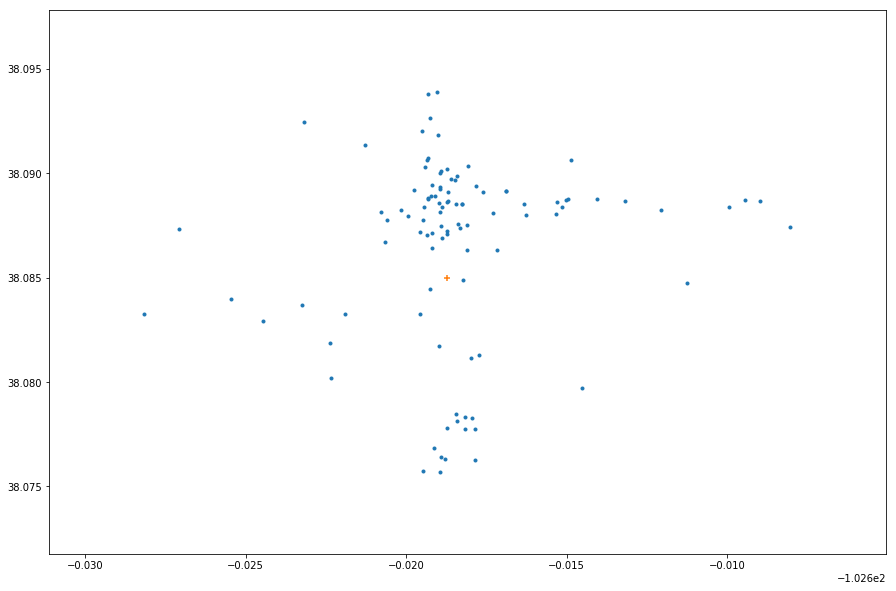

In [14]:
# Note: Be careful in graphing - Latitude is the Y-axis, Longitude is the X-axis. 
# In folium maps, the algorithm adjusts that for you, but in scatter plots you get literal based on 1st or 2nd order.
plt.figure(figsize=(15, 10))
plt.scatter(dataframe_filtered.lng, dataframe_filtered.lat, marker='.')
plt.scatter(longitude, latitude, marker='+')

### Great scatterplot! Exactly what I wanted to see. We can compare this with the cluster map later.

## 3. Explore a Few Venues
> `https://api.foursquare.com/v2/venues/`**VENUE_ID**`?client_id=`**CLIENT_ID**`&client_secret=`**CLIENT_SECRET**`&v=`**VERSION**

### A. Let's explore the closest venue -- _Sheriff Office_

In [15]:
venue_id = '4e541a7245ddffa8d196546a' # ID of Sheriff Office
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
url

'https://api.foursquare.com/v2/venues/4e541a7245ddffa8d196546a?client_id=QPRY52CVA3Z0XPZDEUKMDNXSA0DA5EXWRE23L1ENSG5ZGBLQ&client_secret=1WGT1QSFXD4QYYFFG0ZIB2VB1TG5UCPWCHRQME2UQLSPLG5V&v=20180604'

#### Send GET request for result

In [16]:
result = requests.get(url).json()
print(result['response']['venue'].keys())
result['response']['venue']

dict_keys(['id', 'name', 'contact', 'location', 'canonicalUrl', 'categories', 'verified', 'stats', 'likes', 'dislike', 'ok', 'venueRatingBlacklisted', 'beenHere', 'specials', 'photos', 'reasons', 'hereNow', 'createdAt', 'tips', 'shortUrl', 'timeZone', 'listed', 'pageUpdates', 'inbox', 'attributes'])


{'id': '4e541a7245ddffa8d196546a',
 'name': 'Prowers County Sheriffs Office',
 'contact': {'phone': '7193368050', 'formattedPhone': '(719) 336-8050'},
 'location': {'address': '103 E Oak St',
  'lat': 38.086326599121094,
  'lng': -102.61811065673828,
  'labeledLatLngs': [{'label': 'display',
    'lat': 38.086326599121094,
    'lng': -102.61811065673828}],
  'postalCode': '81052',
  'cc': 'US',
  'city': 'Lamar',
  'state': 'CO',
  'country': 'United States',
  'formattedAddress': ['103 E Oak St', 'Lamar, CO 81052', 'United States']},
 'canonicalUrl': 'https://foursquare.com/v/prowers-county-sheriffs-office/4e541a7245ddffa8d196546a',
 'categories': [{'id': '4bf58dd8d48988d12e941735',
   'name': 'Police Station',
   'pluralName': 'Police Stations',
   'shortName': 'Police Station',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/government_policestation_',
    'suffix': '.png'},
   'primary': True}],
 'verified': False,
 'stats': {'tipCount': 0},
 'likes': {'count'

### B. Get the venue's overall rating.

In [17]:
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


Not all venues are rated in a small town, especially the Sheriff Office.
Let's look at a restaurant. 

In [18]:
venue_id = '4db1c3fb0cb6442b2ed0c4d6' # ID of a Mexican Restaurant
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


Since this restaurant has no ratings, let's check a third venue - Coffee Shop.

In [19]:
venue_id = '53e12089498e9f3e6f0a5c89' # ID of Coffee Shop
url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


### C. We have learned that few venues in this small town are rated. So we write a loop to find which venues are rated. 

In [20]:
# Note: This block shows all reviews if you run it. For Lamar there were no reviews at all. Hence the conclusion statement that follows below.
# Print a line for each venue that has been rated, and '.None.' is it has no rating.
for venue_id in zip(dataframe_filtered.id):
    url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
    result = requests.get(url).json()
    try:
        print("Venue: " + dataframe_filtered.name + "has been rated" + result['response']['venue']['rating'])
    except:
        print('.None.')

.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.
.None.


### Conclusion. There are no ratings on any businesses in this town. That is an interesting lesson about small towns.

## 4. Run Clustering on all of the venues

### A. Identify all the categories.

In [21]:
dataframe_filtered.groupby('categories').count()

,name,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
categories,,,,,,,,,,,,,,
Assisted Living,1,0,1,1,1,0,1,1,1,1,1,0,1,1
Athletics & Sports,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Auto Garage,1,0,1,1,1,0,1,1,1,1,1,0,1,1
Automotive Shop,3,2,3,3,3,0,3,3,3,3,3,3,3,3
Bank,2,0,2,2,2,0,2,2,2,2,2,1,2,2
Bar,4,3,4,4,4,1,4,4,4,4,4,3,4,4
Bookstore,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Building,3,2,3,3,3,0,3,3,3,3,3,3,3,3
Café,2,0,2,2,2,0,2,2,2,2,2,0,2,2


In [22]:
print('There are {} unique categories.'.format(len(dataframe_filtered['categories'].unique())))

There are 62 unique categories.


#### Note: In the NYC example they ordered the venues and selected only the top one. For a small town this is not necessary because the number is much smaller. So that step has been omitted. 

### B. Cluster with K-means

### Create a 2D dataframe from JUST lat and lng in it. Then feed that to kmeans.fit

In [23]:
# 2D data here. Put lng (as x) and lat (as y) into a numpy array. 
df_2d = dataframe_filtered[['lng', 'lat']].values
df_2d

array([[-102.61811066,   38.0863266 ],
       [-102.61957756,   38.0832783 ],
       [-102.61823767,   38.08490369],
       [-102.6193477 ,   38.08705687],
       [-102.61926922,   38.08447277],
       [-102.61918724,   38.08640242],
       [-102.61316299,   38.08867842],
       [-102.62191372,   38.08325666],
       [-102.61785686,   38.07772815],
       [-102.62815654,   38.08328032],
       [-102.6179887 ,   38.08116467],
       [-102.6207971 ,   38.08815944],
       [-102.615143  ,   38.088394  ],
       [-102.61974335,   38.08922577],
       [-102.618947  ,   38.088142  ],
       [-102.61833362,   38.08737209],
       [-102.62447   ,   38.082931  ],
       [-102.61888123,   38.08688736],
       [-102.61501908,   38.08873594],
       [-102.61872   ,   38.08726   ],
       [-102.61890481,   38.08748357],
       [-102.619204  ,   38.087156  ],
       [-102.618965  ,   38.088587  ],
       [-102.61838343,   38.08758549],
       [-102.61494398,   38.0887574 ],
       [-102.61932528,   

In [24]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from scikitlearn
from sklearn.cluster import KMeans

In [25]:
# set number of clusters - experiment with various numbers before submitting assignment
# Lamar has 5 distinct areas of town. Not all have many businesses.
kclusters = 5

# dataframe_grouped_clustering = dataframe_grouped.drop('categories', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_2d)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
print(kmeans.labels_.shape)

(103,)


### C. Create a dataframe of these clusters

In [26]:
dataframe_merged = dataframe_filtered
# add clustering labels
dataframe_merged['Cluster Labels'] = kmeans.labels_

dataframe_merged.head() # check the last columns!

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id,Cluster Labels
0,Prowers County Sheriffs Office,Police Station,103 E Oak St,US,Lamar,United States,NaN,158,"[103 E Oak St, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08632659912109...",38.086327,-102.618111,81052,CO,4e541a7245ddffa8d196546a,4
1,Lamar Middle School,Middle School,104 Park,US,Lamar,United States,NaN,204,"[104 Park, Lamar, CO 81052, United States]","[{'label': 'display', 'lat': 38.08327830407507...",38.083278,-102.619578,81052,CO,4dc1d7f57d8b686fa4700cfe,1
2,Lamar Public Library,Library,102 E Parmenter St,US,Lamar,United States,NaN,43,"[102 E Parmenter St, Lamar, CO 81052, United S...","[{'label': 'display', 'lat': 38.08490368653267...",38.084904,-102.618238,81052,CO,4dac75f24df01c19b1b4ddba,4
3,Las Brisas Mexican Restaurant,Mexican Restaurant,301-399 S Main St,US,Lamar,United States,NaN,236,"[301-399 S Main St, Lamar, CO 81052, United St...","[{'label': 'display', 'lat': 38.08705687398643...",38.087057,-102.619348,81052,CO,4db1c3fb0cb6442b2ed0c4d6,4
4,Colorado East Bank,Professional & Other Places,NaN,US,Lamar,United States,NaN,74,"[Lamar, CO, United States]","[{'label': 'display', 'lat': 38.08447277468658...",38.084473,-102.619269,NaN,CO,4e243ccbfa761d6710979c5c,4


### D. Display a map of the clusters.

In [27]:
# This is duplicate of the address code at the beginning. You can just use those values and not recalculate them here. 
address = city
geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The Latitude Longitude location for {} is {}, {}.'.format(city, latitude, longitude))

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(dataframe_merged['lat'], dataframe_merged['lng'], dataframe_merged['categories'], dataframe_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
#        color='blue',
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
#        fill_color='blue',
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The Latitude Longitude location for Lamar, CO is 38.0872306, -102.6207497.


### WooHoo!! It looks great!

### Export the final dataframe to a csv file on my computer for saving. 

In [ ]:
export_csv = dataframe_merged.to_csv (r'C:\Users\Roger\DocumentsLaJunta_venues.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path

<a id="item6"></a>

### Thank you for reviewing this code!

This notebook was created by [Roger Smith](https://www.linkedin.com/in/rogersmithcto/). I hope you found this project interesting and educational. Feel free to contact me if you have any questions!

This notebook was created as an assignment in the **Coursera** course called *Applied Data Science Capstone*. If you accessed this notebook outside the course, you can take this course online by clicking [here](http://cocl.us/DP0701EN_Coursera_Week2_LAB1).

<hr>
Copyright &copy; 2019 [Roger Smith]. This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).